In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


!pip install fbprophet

In [2]:
from fbprophet import Prophet

In [3]:
import statsmodels.api as sm

In [4]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns
#os.chdir('data')
#from colorsetup import colors, palette
#plt.style.use('fivethirtyeight')
#sns.set_palette(palette)
import pandas as pd
from datetime import datetime
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
globaltemp_df=pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')
globaltemp_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [6]:
globaltemp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [7]:
globaltemp_df.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [8]:
globaltemp_df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [9]:
globaltemp_df.shape

(8599212, 7)

In [10]:
globaltemp_df['AverageTemperature'] = globaltemp_df['AverageTemperature'].interpolate()

In [11]:
globaltemp_df['AverageTemperatureUncertainty'] = globaltemp_df['AverageTemperatureUncertainty'].interpolate()

In [12]:
globaltemp_df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [13]:
globaltemp_df['dt']=pd.to_datetime(globaltemp_df['dt'])

In [14]:
globaltemp_df.set_index(globaltemp_df.dt,inplace=True)

In [15]:
#globaltemp_df.drop(['dt'], axis=1,inplace=True)

In [16]:
globaltemp_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,,
1743-11-01,1743-11-01,6.068,1.7370,Århus,Denmark,57.05N,10.33E
1743-12-01,1743-12-01,6.012,2.1144,Århus,Denmark,57.05N,10.33E
1744-01-01,1744-01-01,5.956,2.4918,Århus,Denmark,57.05N,10.33E
1744-02-01,1744-02-01,5.900,2.8692,Århus,Denmark,57.05N,10.33E
1744-03-01,1744-03-01,5.844,3.2466,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
2013-05-01,2013-05-01,11.464,0.2360,Zwolle,Netherlands,52.24N,5.26E
2013-06-01,2013-06-01,15.043,0.2610,Zwolle,Netherlands,52.24N,5.26E
2013-07-01,2013-07-01,18.775,0.1930,Zwolle,Netherlands,52.24N,5.26E


In [17]:
globaltemp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8599212 entries, 1743-11-01 to 2013-09-01
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 524.9+ MB


In [18]:
globaltemp_df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.599212e+06,8.599212e+06
mean,1.677806e+01,1.065374e+00
std,1.032280e+01,1.127960e+00
min,-4.270400e+01,3.400000e-02
25%,1.037200e+01,3.450000e-01
50%,1.893300e+01,6.280000e-01
75%,2.522900e+01,1.441000e+00
max,3.965100e+01,1.539600e+01


In [19]:
# Create a list of float colums to check for skewing
mask = globaltemp_df.dtypes == np.float
float_cols = globaltemp_df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = globaltemp_df[float_cols].skew()

In [20]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
AverageTemperatureUncertainty,2.932208
AverageTemperature,-0.900188


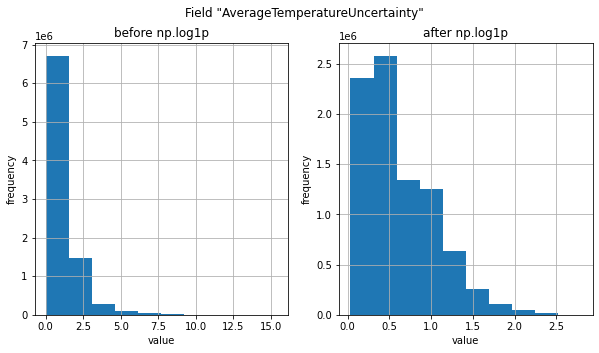

In [21]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "AverageTemperatureUncertainty"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
globaltemp_df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
globaltemp_df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

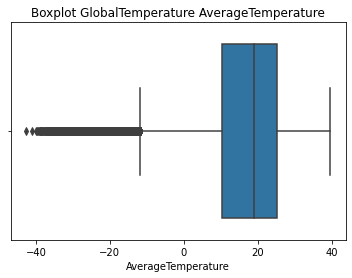

In [22]:
ax=sns.boxplot(x=globaltemp_df['AverageTemperature'])
ax.set(title='Boxplot GlobalTemperature AverageTemperature');

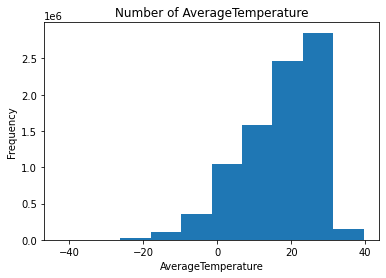

In [23]:
ax=plt.axes()
ax.hist(globaltemp_df['AverageTemperature']);
ax.set(xlabel='AverageTemperature',ylabel='Frequency',title='Number of AverageTemperature');

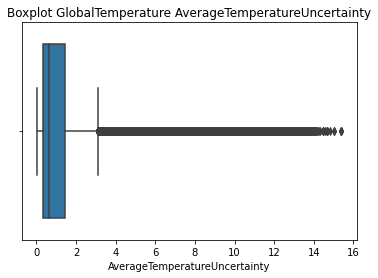

In [24]:
ax=sns.boxplot(x=globaltemp_df['AverageTemperatureUncertainty'])
ax.set(title='Boxplot GlobalTemperature AverageTemperatureUncertainty');

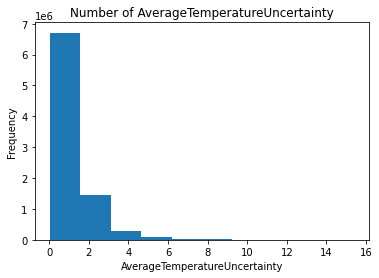

In [25]:
ax=plt.axes()
ax.hist(globaltemp_df['AverageTemperatureUncertainty']);
ax.set(xlabel='AverageTemperatureUncertainty',ylabel='Frequency',title='Number of AverageTemperatureUncertainty');

In [26]:
globaltemp_df.corr()

,AverageTemperature,AverageTemperatureUncertainty
AverageTemperature,1.000000,-0.225311
AverageTemperatureUncertainty,-0.225311,1.000000


sns.pairplot(globaltemp_df)

<AxesSubplot:>

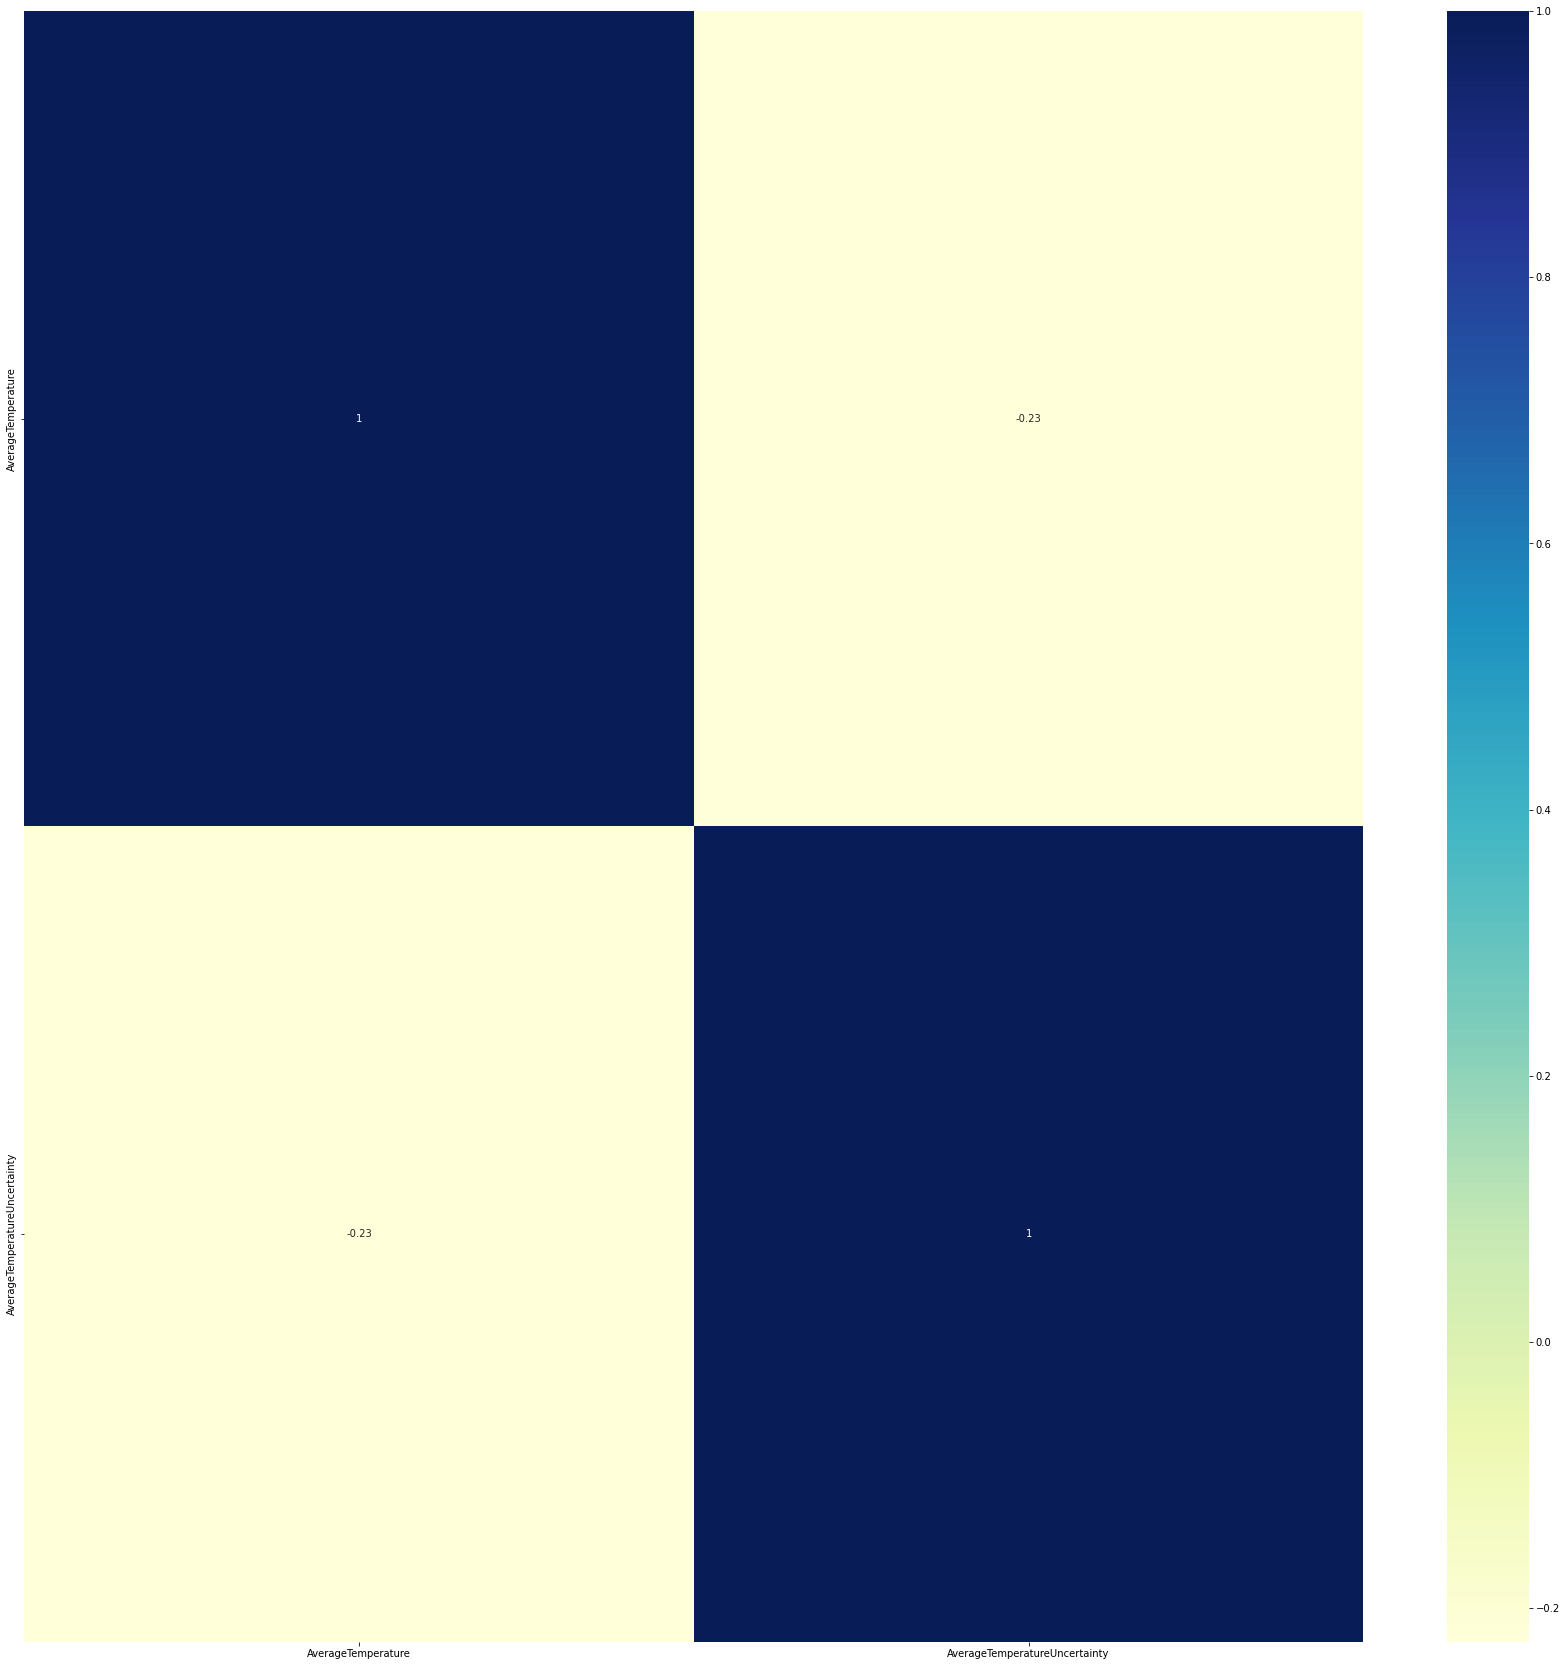

In [27]:
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(globaltemp_df.corr(), cmap="YlGnBu", annot=True)

In [59]:
def get_n_last_days(df, series_name, n_years):
    """
    Extract last n_days of an hourly time series
    """
    
    return df[series_name][-(24*n_years):]
    #return df[series_name][-(12*n_years):] 

def plot_n_last_days(df, series_name, n_years):
    """
    Plot last n_days of an hourly time series 
    """
    plt.figure(figsize = (10,5))   
    plt.plot(get_n_last_days(df, series_name, n_years), 'k-')
    plt.title('{0} Time Series - {1} years'
              .format(series_name, n_years))
    plt.xlabel('Recorded Year')
    plt.ylabel('TemperatureReading')
    plt.grid(alpha=0.3)

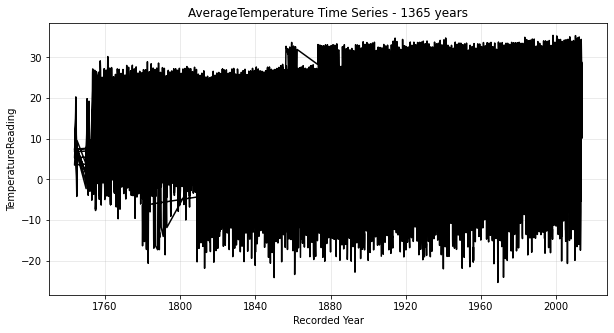

In [60]:
plot_n_last_days(globaltemp_df, 'AverageTemperature', 1365)

In [61]:
df2 = pd.DataFrame().assign(AvgTemp=globaltemp_df['AverageTemperature'])
print(df2)

            AvgTemp
dt                 
1743-11-01    6.068
1743-12-01    6.012
1744-01-01    5.956
1744-02-01    5.900
1744-03-01    5.844
...             ...
2013-05-01   11.464
2013-06-01   15.043
2013-07-01   18.775
2013-08-01   18.025
2013-09-01   18.025

[8599212 rows x 1 columns]


In [62]:
df2.head()

,AvgTemp
dt,
1743-11-01,6.068
1743-12-01,6.012
1744-01-01,5.956
1744-02-01,5.900
1744-03-01,5.844


In [63]:
# describe
df2.describe()

,AvgTemp
count,8.599212e+06
mean,1.677806e+01
std,1.032280e+01
min,-4.270400e+01
25%,1.037200e+01
50%,1.893300e+01
75%,2.522900e+01
max,3.965100e+01


In [64]:
# split data into 10 chunks
chunks = np.split(df2.AvgTemp, indices_or_sections=12)

In [65]:
mean_vals = np.mean(chunks,axis=1)
var_vals = np.var(chunks,axis=1)
vals = {'mean_vals': mean_vals , 'var_vals': var_vals}
mean_var = pd.DataFrame(vals)
mean_var

,mean_vals,var_vals
0,17.611360,109.213091
1,18.067332,91.152969
2,17.254434,96.474458
3,16.257086,97.500726
4,17.782355,101.140561
5,16.335794,120.346575
6,18.235167,93.415550
7,16.071054,118.620339
8,16.731628,104.995846
9,17.043124,104.226401


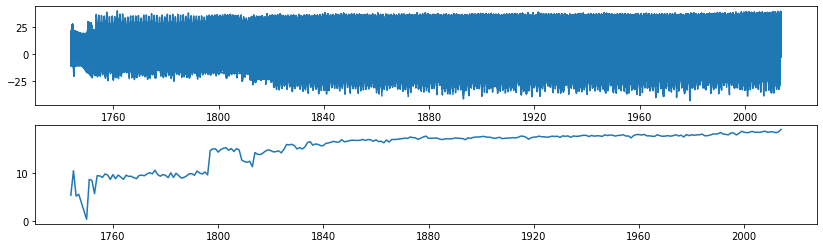

In [66]:
# resample to annual and plot each
plt.rcParams['figure.figsize'] = [14, 4]
annual_temp = df2.resample('A').mean()
fig, axes = plt.subplots(2,1)
axes[0].plot(df2)
axes[1].plot(annual_temp)

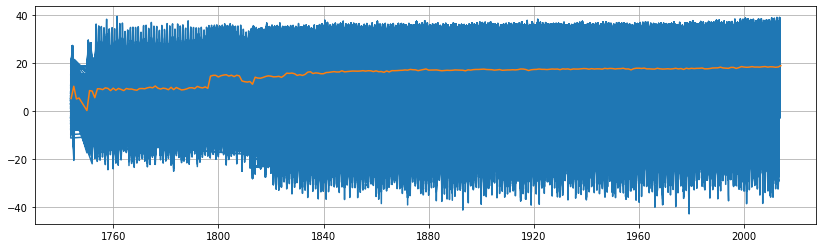

In [67]:
# plot both on same figure
plt.plot(df2)
plt.plot(annual_temp)
plt.grid(b=True);

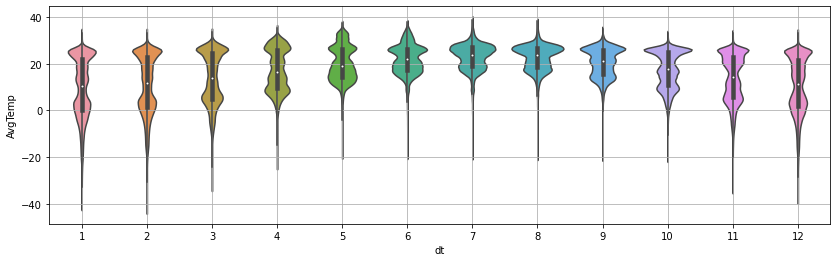

In [68]:
# violinplot of months to determine variance and range
sns.violinplot(x=df2.index.month, y=df2.AvgTemp)
plt.grid(b=True);

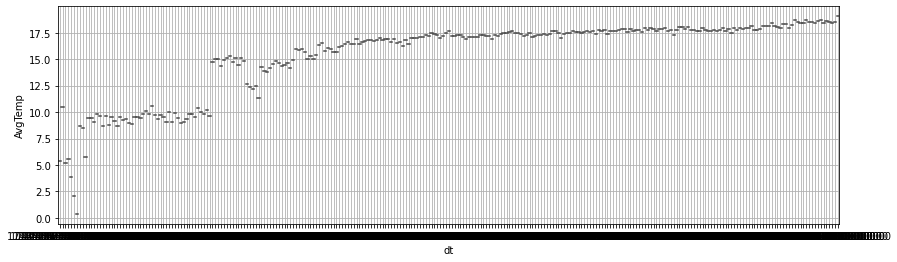

In [69]:
# violinplot of months to determine variance and range
sns.violinplot(x=annual_temp.index, y=annual_temp.AvgTemp)
plt.grid(b=True);

In [70]:
globaltemp_df.shape

(8599212, 7)

In [71]:
def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape 
    [n_samples, time_steps, features]
    """
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

def get_train_test_data(df, series_name, series_days, input_hours, 
                        test_hours, sample_gap=3):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_hours (int): length of sequence input to network 
    test_hours (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    
    forecast_series = get_n_last_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_hours] # training data is remaining days until amount of test_hours
    test = forecast_series[-test_hours:] # test data is the remaining test_hours

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap. 
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_hours, sample_gap): 
        train_X.append(train[i:i+input_hours]) # each training sample is of length input hours
        train_y.append(train[i+input_hours]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours] 
    test_y = test[input_hours:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y

In [72]:
series_days = 56
input_hours = 12
test_hours = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(globaltemp_df, 'AverageTemperature', series_days, 
                         input_hours, test_hours))

In [73]:
train_y.shape

(436,)

In [74]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (436, 12, 1)
Training output shape: (436,)
Test input shape: (12,)
Test output shape: (12,)


In [75]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

In [76]:
model = fit_SimpleRNN(train_X, train_y, cell_units=10, epochs=10)

In [77]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds

def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_hours)  #predict range is going to be from end of X_init to length of test_hours
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

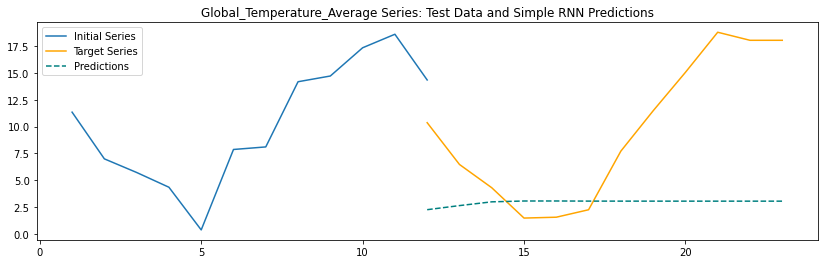

In [78]:
predict_and_plot(test_X_init, test_y, model,
                 'Global_Temperature_Average Series: Test Data and Simple RNN Predictions')

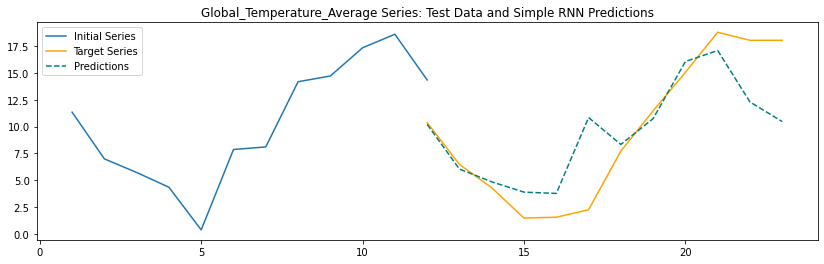

In [79]:
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=1200)
predict_and_plot(test_X_init, test_y, model,
                 'Global_Temperature_Average Series: Test Data and Simple RNN Predictions')

In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 30)                960       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [81]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

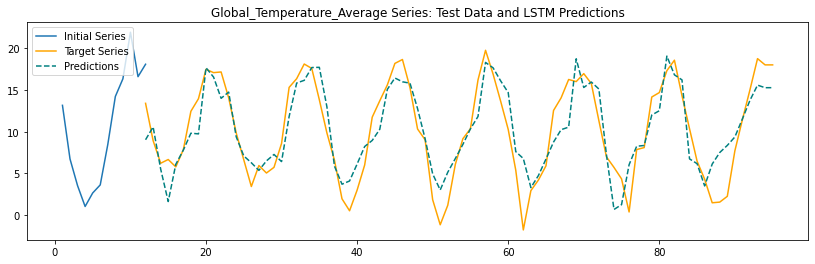

In [82]:
series_days = 50 
input_hours = 12
test_hours = 96

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(globaltemp_df, 'AverageTemperature', series_days, 
                         input_hours, test_hours))

model = fit_LSTM(train_X, train_y, cell_units=70, epochs=3000) 

predict_and_plot(test_X_init, test_y, model, 
                 'Global_Temperature_Average Series: Test Data and LSTM Predictions')

In [83]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 70)                20160     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 71        
Total params: 20,231
Trainable params: 20,231
Non-trainable params: 0
_________________________________________________________________


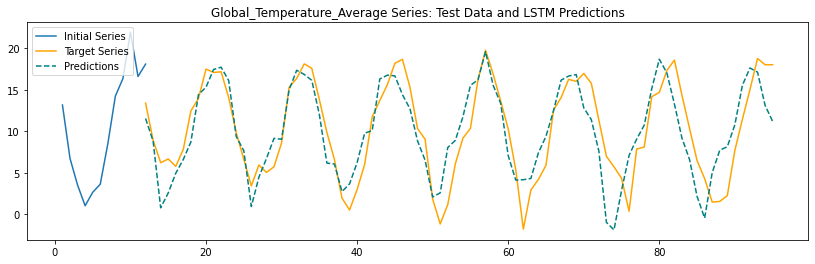

In [84]:
series_days = 50 
input_hours = 12
test_hours = 96

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(globaltemp_df, 'AverageTemperature', series_days, 
                         input_hours, test_hours))

model = fit_LSTM(train_X, train_y, cell_units=100, epochs=3000) 

predict_and_plot(test_X_init, test_y, model, 
                 'Global_Temperature_Average Series: Test Data and LSTM Predictions')

In [85]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


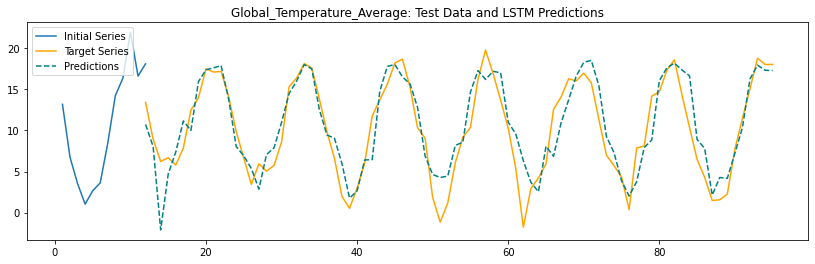

In [86]:
series_days = 50 
input_hours = 12
test_hours = 96

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(globaltemp_df, 'AverageTemperature', series_days, 
                         input_hours, test_hours))

model = fit_LSTM(train_X, train_y, cell_units=130, epochs=3000) 

predict_and_plot(test_X_init, test_y, model, 
                 'Global_Temperature_Average: Test Data and LSTM Predictions')

In [87]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 130)               68640     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 131       
Total params: 68,771
Trainable params: 68,771
Non-trainable params: 0
_________________________________________________________________
